## Integrantes
* Lucio Cornejo
* Andrea Mejia
* Claudia Vivas
* Renzo Richle

1. [Paso 2](#paso-2)
    - [Adquisición de Datos](#adquisicion-de-datos)
2. [Paso 3](#paso-3)
    - [Entendimiento de los datos](#entendimiento-de-los-datos)
    - [Duplicados](#duplicados)
    - [Vacios](#vacios)
    - [Medidas de resumen para variables numéricas](#medidas-de-resumen-para-variables-numericas)
    - [Medidas de resumen para variables categóricas](#medidas-de-resumen-para-variables-categoricas)
    - [Tratamiento de datos atípicos](#tratamiento-de-datos-atipicos)
        - [Outliers por exceso](#outliers-por-exceso)
        - [Outliers por defecto](#outliers-por-defecto)
        - [Separar la base en atipicos y no atipicos](#separar-la-base-en-atipicos-y-no-atipicos)
    

## Paso 2: Adquisicion de Datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Cargamos la base de datos
tracks = pd.read_csv(r'F:\2022-1\Analisis de datos\Tarea Academica\archive\tracks.csv')
#tracks = pd.read_csv("../datos/tracks.csv")

In [3]:
tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


Notamos que algunas de las columnas nos generan la misma información, pese a su presentación diferente.

Por ejemplo, la variable **id_artists** es un identificador único por artista, así que 
nos proporciona casi completamente la misma información que la variable **artists** (nombre del artista).

Análogamente sucede para las variables **id** (identificador de la canción) y **name** (nombre de la canción).

Sin embargo, debido a la posibilidad de que existan canciones con el mismo nombre,
o artistas con el mismo nombre _musical_, no descartaremos, por ahora, a las columnas **id** e **id_artists**,
en caso resulten necesarias más adelante en el análisis.

## Paso 3: Entendimiento de los datos

In [4]:
print('La base tiene', tracks.shape[0], 'filas y', tracks.shape[1], 'columnas')

La base tiene 586672 filas y 20 columnas


In [5]:
print('Las columnas se la base se llaman:', tracks.columns.to_list())

Las columnas se la base se llaman: ['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists', 'id_artists', 'release_date', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']


In [6]:
tracks.dtypes
print('Se tiene los siguientes tipos de datos por columna: \n',tracks.dtypes)

Se tiene los siguientes tipos de datos por columna: 
 id                   object
name                 object
popularity            int64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object


En base a la documentación del API de Spotify, se tiene la siguiente
decripción de las variables:

Variable | Descripción | Tipo de dato
:---: | :---: | :---:
id | Identificador de la canción | string
name | Nombre de la canción | string
popularity | Popularidad | int
duration_ms | La duración del track en milisegundos | int
explicit | Si el track cuenta con las letras proporcionadas por el servicio de Explicit | boolean
artists | El artista del track | object artist
id_artists | El id del artista del track | object artist
release_date | Fecha de lanzamiento | string
danceability | Describe qué tan adecuada es una pista para bailar n valor de 0,0 es menos bailable y 1,0 es el más bailable | float
energy | La energía es una medida de 0,0 a 1,0 y representa una medida perceptiva de intensidad y actividad. | float
key | Indica el centro tonal de la canción, representando a las doce principales notas musicales vía los enteros entre 0 y 11. | int
loudness | Volumen de la pista en decibelios  | float
mode | Indica la modalidad (mayor (1) o menor (0) ) de una canción. | int 
speechiness | Valor entre 0 y 1, donde la cercanía a 1 representa más palabras cantadas en la canción. | float
instrumentalness | Predicción sobre la presencia o ausencia de algún cantante en la canción. | float
acousticness | Proporción de la parte vocal en la canción; cerca a 1 significa menos parte vocal | float
liveness | Detecta la presencia de una audiencia en la grabación | float
valence | Describe la positividad emocional de una pista | float
tempo | La rapidez general de la canción, estimada en pulsaciones por minuto | float
time_signature | Especifica cuántos pulsos hay en cada compás | int 

In [7]:
# Descripción de los datos
tracks.info()

type(tracks.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

pandas.core.indexes.base.Index

In [8]:
# Convertimos las variables object a variables string 
tracks[['id', 'name', 'artists', 'id_artists']] = tracks[['id', 'name', 'artists', 'id_artists']].astype('string')

In [9]:
# Convertimos la variable 'release_date', de object a datetime64[ns]
tracks['release_date'] = pd.to_datetime(tracks['release_date'], format = "%Y-%m-%d")

### Datos duplicados

In [10]:
# Como cada fila de este dataset corresponde a una canción diferente,
# omitimos los duplicados vía el identificador de cada canción
print(tracks.shape)
tracks.drop_duplicates(subset = 'id', inplace = True)
print(tracks.shape)

(586672, 20)
(586672, 20)


Se observa que los datos no tienen filas con valores duplicados, es decir, no existen registros repetidos.

### Datos vacíos

In [11]:
# Contabilizamos vacíos
vacios = pd.DataFrame(tracks.isnull().sum()).sort_values(0,ascending=True)
vacios.columns = ['vacios']
vacios['vacios%'] = round(vacios['vacios']/tracks.shape[0], 2)*100
vacios 

,vacios,vacios%
id,0,0.0
valence,0,0.0
liveness,0,0.0
instrumentalness,0,0.0
acousticness,0,0.0
speechiness,0,0.0
mode,0,0.0
loudness,0,0.0
key,0,0.0
energy,0,0.0


Encontramos que solo la columna "name" almacena valores vacios, en particular, 71.

Como se comentó en el paso dos, es posible que la columna "name" se trate de un identificador.
Asimismo, la información de la columna "id" identifica a las canciones, así que, como
la variable "id" **no presenta valores vacíos**, no es necesario remover las filas
asociadas a valores vacíos de la columna "name".

Más bien, basta descartar a la columna "name", pues su información podemo obtenerla
vía la variable "id".

### Medidas de resumen para variables numericas

In [20]:
# Separación de variables en numéricas y categóricas
dfnum = tracks.select_dtypes(include = ['float64', 'int64'])
dfcat = tracks.select_dtypes(exclude = ['float64', 'int64'])

In [21]:
print('Variables categóricas', dfcat.shape)
print('Variables numéricas', dfnum.shape)

Variables categóricas (586672, 5)
Variables numéricas (586672, 15)


In [22]:
# Estadisticos desciptivas para las variables numéricas
dfnum.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


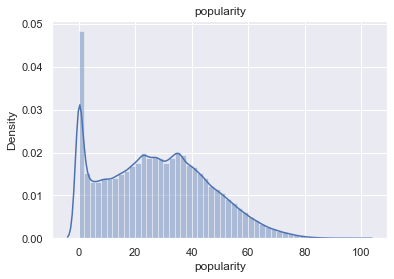

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


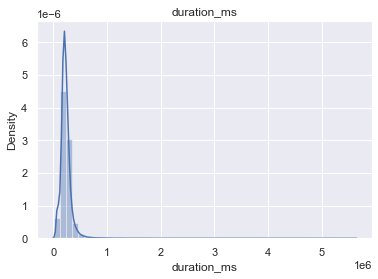

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


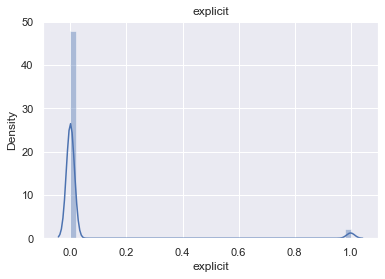

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


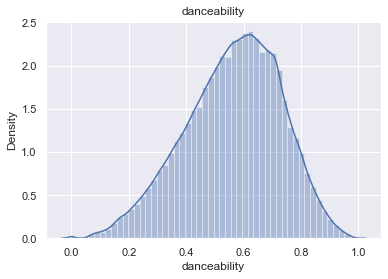

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


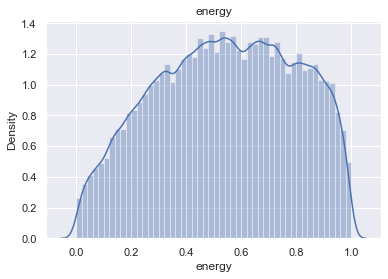

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


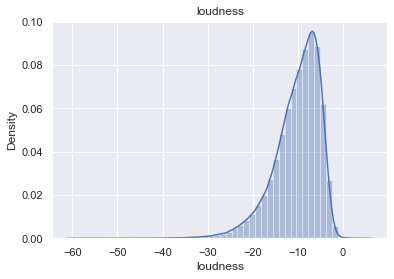

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


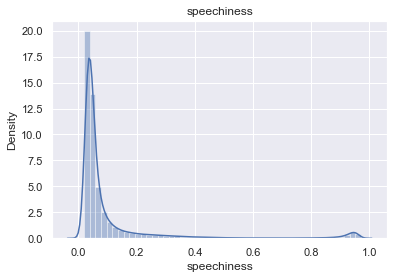

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


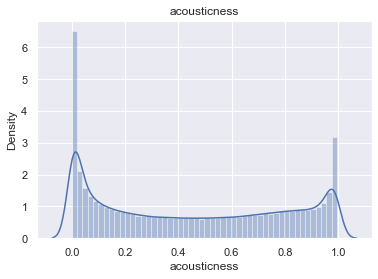

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


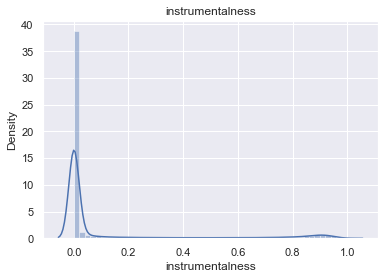

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


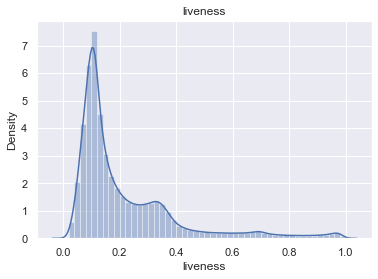

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


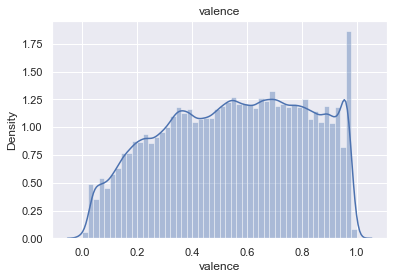

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


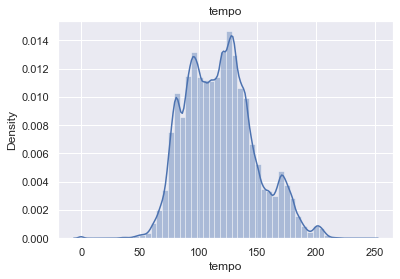

In [38]:
# Visualización de los datos numéricos
columnas_numericas = dfnum.columns.tolist()
sns.set(style = "darkgrid")
for col in columnas_numericas:
  sns.distplot(dfnum[col])
  plt.title(col)
  plt.show()

Note entonces que las variables **key**, **mode** y **time_signature** no parecen ser variables numéricas.

En base a la descripción de tales variabes, como se observa en la tabla presentada en el paso 2,
convertiremos aquellas tres variables a strings, por tratarse de valores categóricos.

Por ello, volvemos a separar en dos grupos a las variables del dataset en original.

In [28]:
tracks[["key", "mode", "time_signature"]] = tracks[["key", "mode", "time_signature"]].astype('string')

# División de variables numéricas y categóricas
dfnum = tracks.select_dtypes(include = ['float64', 'int64'])
dfcat = tracks.select_dtypes(exclude = ['float64', 'int64'])

# Nuevas dimensiones
print('Variables categóricas', dfcat.shape)
print('Variables numéricas', dfnum.shape)

Variables categóricas (586672, 8)
Variables numéricas (586672, 12)


### Medidas de resumen para variables categoricas

In [37]:
for columna in dfcat.columns[0:2]:
  print(dfcat[columna].value_counts())

35iwgR4jXetI318WEWsa1Q    1
0BRXJHRNGQ3W4v9frnSfhu    1
0grXU6GKVNCVMJbseA0Uhe    1
2u7t2vcrLxKp69Um0MDEs2    1
0IgI1UCz84pYeVetnl1lGP    1
                         ..
6IGuPIQaRd7PPsKO35N1dv    1
1dKxf4Ht2SsKLyXfSDJAgy    1
4ow9HehIdFii1cggylW2k0    1
29NewYj57n6o1CFwmm03mp    1
5Ocn6dZ3BJFPWh4ylwFXtn    1
Name: id, Length: 586672, dtype: Int64
Summertime                                101
Intro                                      92
Year 3000                                  91
Hold On                                    87
2000 Years                                 76
                                         ... 
Ententanz (Dance Little Bird)               1
So sehr dabei - Live / Remastered 2014      1
Vertige De L'Amour                          1
Mêmeil et Marie                             1
A Day At A Time                             1
Name: name, Length: 446474, dtype: Int64


In [ ]:
dfcat.columns

# 'id' y 'id_artists' son variables que no son relevantes para el analisis 

In [ ]:
dfcat[['name', 'artists']].mode()

In [ ]:
dfcat[['release_date']].mode()

In [ ]:
dfcat['release_date'].median()

# DESCRIBIR ESTOS ESTADISTICOS, NO TENEMOS UN GRAFICO QUE PUEDE DESCRIBIR ESTAS VARIABLES

## **Tratamiento de Datos Atípicos y Estadísticas Descriptivas**

### Tratamiento de datos atípicos

#### Datos numéricos

In [ ]:
# Variables que tienen valores atípicos superiores
descriptivesMax_num = dfnum.describe(percentiles = list(np.arange(0, 1, 0.05)))
descriptivesMax_num.loc['max'] > (descriptivesMax_num.loc['75%'] + (1.5* (descriptivesMax_num.loc['75%']-descriptivesMax_num.loc['25%']) ) )

In [ ]:
# Variables que tienen valores atípicos inferiores
descriptivesMin = dfnum.describe(percentiles = list( np.arange(0, 1, 0.05)) )
descriptivesMin.loc['min'] < ( descriptivesMin.loc['25%'] + (1.5* (descriptivesMax_num.loc['75%']-descriptivesMax_num.loc['25%']) ) ) 

In [ ]:
dfnum.describe().quantile(0.5)

Variables categóricas (con representacion numérica): \
explicit, key y mode. 

In [ ]:
# Variables con valores atípicos
dfnum_outlier = dfnum[['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]

In [ ]:
dfnum_outlier.describe()

In [ ]:
columnas = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature']
for col in columnas:
    dfnum_outlier.boxplot(column = [col])
    plt.title(col)
    plt.show()


In [ ]:
# Podemos definir una función que haga lo mismo para cualquier columna numérica
def loc_outliers(df, columna):
  q1 = df[columna].quantile(0.25)
  q3 = df[columna].quantile(0.75)
  iqr = q3 - q1
  ul = q3 + 1.5*iqr
  ll = q1 - 1.5*iqr
  return (df[columna] > ul) | (df[columna] < ll) 

In [ ]:
# Define una función que encuentre todos los outliers por exceso
def loc_outliers_exceso(df, columna):
  q1 = df[columna].quantile(0.25)
  q3 = df[columna].quantile(0.75)
  iqr = q3 - q1
  ul = q3 + 1.5*iqr
  return (df[columna] > ul)

# Define una función que encuentre todos los outliers por defecto
def loc_outliers_defecto(df, columna):
  q1 = df[columna].quantile(0.25)
  q3 = df[columna].quantile(0.75)
  iqr = q3 - q1
  ll = q1 - 1.5*iqr
  return (df[columna] < ll)

In [ ]:
# Reemplazamos todos los outliers por exceso de la columna "antiguedad" por el máximo valor No outlier
for col in columnas:
    dfnum_outlier.loc[loc_outliers_exceso(dfnum_outlier, col)] = dfnum_outlier.loc[loc_outliers_exceso(dfnum_outlier, col)==False, col].max()
    dfnum_outlier.loc[loc_outliers_defecto(dfnum_outlier, col)] = dfnum_outlier.loc[loc_outliers_defecto(dfnum_outlier, col)==False, col].min()

In [ ]:
# Volvemos a generar boxplots para verificar imputaciones
for col in columnas:
    dfnum_outlier.boxplot(column = [col])
    plt.title(col)
    plt.show()

In [ ]:
# Graficamos el Q-Q plot de cada variable
# ¿Qué variables aparentemente siguen una distribución normal/gaussiana?
import pylab 
import scipy.stats as stats

# La funcion select_dtypes genera un data frame formado únicamente por
# columnas del tipo indicado como argumento
for col in dfnum_outlier.select_dtypes('number').columns:
  stats.probplot(dfnum_outlier[col], dist = "norm", plot = plt)
  plt.title(col)
  pylab.show()